<a href="https://colab.research.google.com/github/samibahig/RecoverProject/blob/main/DecisionTreeProteomic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
This script extract a data and metadata from the files
it gives dataframes and a labels file
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
data_path = ''

#print('\nMETADATA :')
metadata_filename = data_path + '/content/metadata.csv'
meta_df = pd.read_csv(metadata_filename)
#print(meta_df.columns)
meta_df.columns = ['#', 'plate', '-', 'symptoms'] + list(meta_df)[4:]
#print(meta_df.columns)
#print('available metadata :', list(meta_df))
meta_idx = meta_df['ID'].to_list()
meta_label = meta_df['symptoms'].to_list()
#print('------------------')
#print(list(zip(meta_idx, meta_label)))
#print('------------------')
meta_id_label_dict = {str(k): 1 if v=='S' else 0 for k, v in zip(meta_idx, meta_label)}

#DF1 : proteomics
#print('\nPROEOMICS DATA :')
proteomics_data_filename = '/content/B.merge.csv'

dim_df = pd.read_csv(proteomics_data_filename, nrows=1)
#print('--------')
#print(dim_df)
#print('--------')
dim = len(list(dim_df))
#print(dim)
#print('------------')
print('# of columns in source csv file :', dim)
all_cols = [i for i in range(dim)]

print('--------')
feat_cols = all_cols[1:-4]
print(feat_cols)
print('--------')
samplesidx_col = [0]

feat_df = pd.read_csv(proteomics_data_filename, skiprows=4, nrows=1, dtype=str, usecols=feat_cols)
features = list(feat_df)
print('# of features : ', len(features))
print('first feature :', features[0])
print('last feature :', features[-1])

idx_df = pd.read_csv(proteomics_data_filename, skiprows=6, index_col=0, skipfooter=4, usecols=[0], engine='python')
idx = list(idx_df.index.values)
print('# of idx : ', len(idx))
print('first id :', idx[0])
print('last id :', idx[-1])

df1 = pd.read_csv(proteomics_data_filename, skiprows=6, dtype=np.float32, skipfooter=4, usecols=feat_cols, engine='python')
assert df1.shape[0] == len(idx)
assert df1.shape[1] == len(features)

df1['idx'] = idx
df1.set_index('idx', inplace=True)
df1.columns = features
print('# of Nan values :', df1.isna().sum().sum())

#clean data of samples that are not in metadata :
idx = df1.index.values
y = []
for k in range(len(idx)):
    id = idx[k]
    if id in meta_id_label_dict:
        y.append(meta_id_label_dict[id])
    else:
        # we will not put this sample in the dataset
        #print('sample to remove because of unknown label:', k, id)
        y.append('to_remove')
df1['label'] = y
df1 = df1[df1.label != 'to_remove']

#create X and y matrices for ML :
y = list(df1['label'])
del df1['label']
print('---------')
print(df1)
print('---------')
X = df1.to_numpy()
print('proteomics data :')
print('# of samples : ', df1.shape[0])
print('# of features : ', df1.shape[1])
print('labels:', list(dict.fromkeys(y)))


## save X and y in pickles if you want :
##data_name = 'recover_multiomics_'
##feat_dict = {k: str(v) for k, v in zip(range(len(list(df))), list(df))}
##with open(data_path + data_name + 'feat_dict', 'wb') as fo:
##    pkl.dump(feat_dict, fo)
##with open(data_path + data_name + 'X', 'wb') as fo:df
##            pkl.dump(X, fo)
##with open(data_path + data_name + 'y', 'wb') as fo:
##            pkl.dump(y, fo)

# of columns in source csv file : 230
--------
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree

In [ ]:
#### Bootstrapping ####
########################################################
# Creating empty list to hold accuracy values
AccuracyValues=[]
n_times=30

In [ ]:
## Performing bootstrapping
from sklearn import metrics
for i in range(n_times):
    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    # Changing the seed value for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42+i)
    tree_clf = DecisionTreeClassifier(max_depth=3)
    tree_clf.fit(X_train, y_train)
    ########################################################
    prediction = tree_clf.predict(X_test, check_input=True)
    Accuracy=metrics.accuracy_score(y_test, prediction)
    AccuracyValues.append(np.round(Accuracy))

In [ ]:
###### Single Decision Tree Regression in Python #######
    #choose from different tunable hyper parameters
    #RegModel = tree.DecisionTreeRegressor(max_depth=3,criterion='mse')
 
    #Creating the model on Training Data
    #DTree=RegModel.fit(X_train,y_train)
    #prediction=DTree.predict(X_test)
 
    #Measuring accuracy on Testing Data
#Accuracy=100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)
    
    # Storing accuracy values
#AccuracyValues.append(np.round(Accuracy))
    
################################################
# Result of all bootstrapping trials
print(AccuracyValues)
 
# Final accuracy
print('Final average accuracy',np.mean(AccuracyValues))

[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Final average accuracy 0.4666666666666667


In [ ]:
(prediction).astype(int).sum()/len(y_test)

0.3333333333333333

[Text(197.83636363636364, 190.26, 'X[86] <= -0.211\ngini = 0.494\nsamples = 72\nvalue = [40, 32]'),
 Text(121.74545454545455, 135.9, 'X[9] <= 1.637\ngini = 0.476\nsamples = 46\nvalue = [18, 28]'),
 Text(60.872727272727275, 81.53999999999999, 'X[88] <= 2.148\ngini = 0.35\nsamples = 31\nvalue = [7, 24]'),
 Text(30.436363636363637, 27.180000000000007, 'gini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(91.30909090909091, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(182.61818181818182, 81.53999999999999, 'X[132] <= 3.837\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(152.1818181818182, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(213.05454545454546, 27.180000000000007, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(273.92727272727274, 135.9, 'X[15] <= 3.929\ngini = 0.26\nsamples = 26\nvalue = [22, 4]'),
 Text(243.4909090909091, 81.53999999999999, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(304.3636363636364, 81.53999

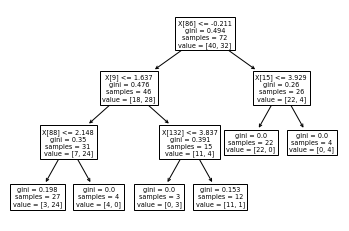

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)  

In [ ]:
print('\nMETABOLOMICS DATA :')
metabolomics_data_filename = data_path + 'metabolomics.csv'
feat_df = pd.read_csv(metabolomics_data_filename, index_col=0, skiprows=[0], dtype=str, usecols=[0])
features = list(feat_df.index.values)
print('# of features : ', len(features))
print('first feature :', features[0])
print('last feature :', features[-1])
col_list = ["Group"]
column1 = pd.read_csv(metabolomics_data_filename, usecols=col_list)
print('----------')
column1 = column1['Group'].to_list()
print(column1[1:])

print('----------')
idx_df = pd.read_csv(metabolomics_data_filename, header=1, nrows=1, encoding='unicode_escape')

idx = list(idx_df)[1:]
idx = [l[17:22] for l in idx]
labels_df = pd.read_csv(metabolomics_data_filename, nrows=1)
labels = list(labels_df)[1:]
print('# of labels : ', len(labels))

cols_df = pd.read_csv(metabolomics_data_filename, header=1, nrows=1, encoding='unicode_escape')
cols_list = list(cols_df)

df3 = pd.read_csv(metabolomics_data_filename, header=1, na_values=['#DIV/0!'], usecols=cols_list[1:], encoding='unicode_escape')
df3 = df3.T
df3['idx'] = idx
df3.set_index('idx', inplace=True)
df3.columns = features
df3 = df3.dropna(axis=1)

#clean data of samples that are not in metadata :
idx = df3.index.values
y = []
for k in range(len(idx)):
    id = idx[k]
    if id in meta_id_label_dict:
        y.append(meta_id_label_dict[id])
    else:
        # we will not put this sample in the dataset
        #print('sample to remove because of unknown label:', k, id)
        y.append('to_remove')
df3['label'] = y
df3 = df3[df3.label != 'to_remove']

#create X and y matrices for ML :
y = list(df3['label'])
print(y)
del df3['label']
X = df3.to_numpy()

print('metabolomics data :')
print('# of samples : ', df3.shape[0])
print('# of features : ', df3.shape[1])
print('labels:', list(dict.fromkeys(y)))

## to concatenate the 2 proteomics dataframes and the metabolomics if you want :
##df = pd.concat([df_1_2, df3], axis=1)
##df = df.dropna(axis=0)
##print('multi-omics df :')
##print('# of samples : ', df.shape[0])
##print('# of features : ', df.shape[1])


METABOLOMICS DATA :
# of features :  4068
first feature : 3.15_160.1695m/z
last feature : 7.71_483.0063m/z
----------
['3.15_160.1695m/z', '8.56_366.6297m/z', '6.52_828.4067n', '7.23_281.0516m/z', '8.34_429.0893m/z', '4.55_252.0298m/z', '4.56_234.0194m/z', '4.55_220.0590m/z', '5.19_386.0794m/z', '8.56_367.6297m/z', '4.55_337.0498n', '7.68_358.3671m/z', '5.07_371.2588m/z', '5.87_393.0866m/z', '8.34_485.1126m/z', '8.34_445.1197m/z', '4.04_133.0143m/z', '7.68_355.0720m/z', '8.87_519.1391m/z', '4.54_352.0727m/z', '8.34_248.0596m/z', '8.34_355.0706m/z', '5.19_370.2564m/z', '4.78_354.0894m/z', '7.68_371.1045m/z', '9.58_445.1201m/z', '7.68_281.0517m/z', '8.34_281.0516m/z', '8.34_371.1021m/z', '3.24_268.0614m/z', '5.28_429.2386m/z', '7.68_248.0590m/z', '4.04_151.0293m/z', '4.08_284.0562m/z', '8.87_206.0254n', '8.38_207.0326m/z', '6.52_414.2042n', '8.34_223.0674m/z', '4.60_368.0878m/z', '8.87_559.1315m/z', '7.68_190.0325n', '7.68_411.1100m/z', '6.52_119.0859m/z', '5.87_449.1529m/z', '8.87_355.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [ ]:
#### Bootstrapping ####
########################################################
# Creating empty list to hold accuracy values
AccuracyValues=[]
n_times=60

In [ ]:
## Performing bootstrapping
from sklearn import metrics
for i in range(n_times):
    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    # Changing the seed value for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42+i)
    tree_clf = DecisionTreeClassifier(max_depth=3)
    tree_clf.fit(X_train, y_train)
    ########################################################
    prediction = tree_clf.predict(X_test, check_input=True)
    Accuracy=metrics.accuracy_score(y_test, prediction)
    AccuracyValues.append(np.round(Accuracy))

In [ ]:
###### Single Decision Tree Regression in Python #######
    #choose from different tunable hyper parameters
    #RegModel = tree.DecisionTreeRegressor(max_depth=3,criterion='mse')
 
    #Creating the model on Training Data
    #DTree=RegModel.fit(X_train,y_train)
    #prediction=DTree.predict(X_test)
 
    #Measuring accuracy on Testing Data
#Accuracy=100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)
    
    # Storing accuracy values
#AccuracyValues.append(np.round(Accuracy))
    
################################################
# Result of all bootstrapping trials
print(AccuracyValues)
 
# Final accuracy
print('Final average accuracy',np.mean(AccuracyValues))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Final average accuracy 1.0


In [ ]:
(prediction).astype(int).sum()/len(y_test)

0.7

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = tree_clf.predict(X_test, check_input=True)
print(len(predictions), predictions)

20 [0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1]


In [ ]:
(predictions).astype(int).sum()/len(y_test)

0.5

[Text(167.4, 163.07999999999998, 'X[2838] <= -41.158\ngini = 0.499\nsamples = 80\nvalue = [38, 42]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]')]

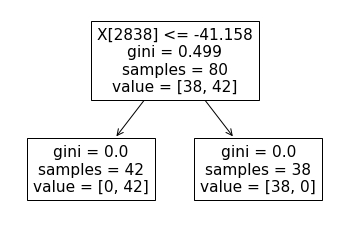

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)  

In [ ]:
import pandas as pd
proteomics_cyt_data_filename = '/content/proteomics_cyt.csv'
proteomics_data_filename = '/content/proteomics.csv'
dim_df1 = pd.read_csv(proteomics_data_filename)
dim_df2 = pd.read_csv(proteomics_cyt_data_filename)
#Proteomic_merge = pd.concat([dim_df1, dim_df2], axis=1, join='inner')

In [ ]:
dim_df1

,20210504_Corbeil,Olink NPX Manager 2.2.3.340,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188
0,NPX data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Panel,Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),...,Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink Target 96 Inflammation(v.3022),Olink 

In [ ]:
dim_df2

,20210505_Corbeil,Olink NPX Manager 2.2.3.340,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,Quantified data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Panel,Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002)
2,Assay,CCL8,IL33,CXCL12,OLR1,IL27,IL2,CXCL9,TGFA,IL1B,IL6,IL4,TNFSF12,TSLP,CCL11,HGF,FLT3LG,IL17F,IL7,IL13,IL18,CCL13,TNFSF10,CXCL10,IFNG,IL10,CCL19,TNF,IL15,CCL3,CXCL8,MMP12,CSF2,CSF3,VEGFA,IL17C,EGF,CCL2,IL17A,OSM,CSF1,CCL4,CXCL11,LTA,CCL7,MMP1,Plate ID,QC Warning
3,Uniprot ID,P80075,O95760,P48061,P78380,Q8NEV9_Q14213,P60568,Q07325,P01135,P01584,P05231,P05112,O43508,Q969D9,P51671,P14210,P49771,Q96PD4,P13232,P35225,Q14116,Q99616,P50591,P02778,P01579,P22301,Q99731,P01375,P40933,P10147,P10145,P39900,P04141,P09919,P15692,Q9P0M4,P01133,P13500,Q16552,P13725,P09603,P13236,O14625,P01374,P80098,P03956,NaN,NaN
4,OlinkID,OID05580,OID05581,OID05582,OID05583,OID05584,OID05585,OID05587,OID05588,OID05589,OID05590,OID05591,OID05592,OID05593,OID05594,OID05595,OID05596,OID05597,OID05598,OID05600,OID05601,OID05602,OID05603,OID05604,OID05605,OID05606,OID05607,OID05608,OID05610,OID05611,OID05612,OID05613,OID05614,OID05615,OID05616,OID05617,OID05618,OID05619,OID05620,OID05621,OID05622,OID05623,OID05624,OID05625,OID05626,OID05627,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Plate LOD,NaN,0.0312343133705312,19.0730274981457,NaN,0.0517840068558054,0.00471968296292724,NaN,0.387509348084349,0.0105744870779932,0.00634596288849383,0.0218899608430032,NaN,0.11105192408912,0.0266850491514178,0.0215368051747247,NaN,0.336278806481936,0.102604153329603,0.0307421573726512,0.104350799342013,0.001971

In [ ]:
# DF 2 : proteomics (Merge_cytokines)
print('\nPROTEOMICS Merge DATA :')
a_merge_filename = '/content/a_merge.csv'

dim_df = pd.read_csv(proteomic_merge_filename)

#Proteomic_merge = pd.merge(dim_df, dim_df2)

dim = len(list(dim_df))
print('# of columns in source csv file :', dim)
all_cols = [i for i in range(dim)]
print('---------')
print(all_cols)
print('---------')
feat_cols = all_cols[1:-2]
print('---------')
print(feat_cols)
print('---------')
samplesidx_col = [0]
print(samplesidx_col)
print('---------')

print('-------')
feat_df = pd.read_csv(proteomic_merge_filename, skiprows=4, nrows=1, dtype=str, usecols=feat_cols)
print(feat_df)
features = list(feat_df)
print(features)
print('# of features : ', len(features))
print('first feature :', features[0])
print('last feature :', features[-1])

idx_df = pd.read_csv(proteomic_merge_filename, skiprows=7, index_col=0, skipfooter=14, usecols=[0], engine='python')
idx = list(idx_df.index.values)
print('# of idx : ', len(idx))
print('first id :', idx[0])
print('last id :', idx[-1])

df2 = pd.read_csv(proteomic_merge_filename, skiprows=7, skipfooter=14, usecols=feat_cols, na_values=['> ULOQ'], engine='python')
assert df2.shape[0] == len(idx)
assert df2.shape[1] == len(features)

df2['idx'] = idx
df2.set_index('idx', inplace=True)
df2.columns = features
print('# of Nan values :', df2.isna().sum().sum())

#clean data of samples that are not in metadata :
idx = df2.index.values
y = []
for k in range(len(idx)):
    id = idx[k]
    if id in meta_id_label_dict:
        y.append(meta_id_label_dict[id])
    else:
        # we will not put this sample in the dataset
        #print('sample to remove because of unknown label:', k, id)
        y.append('to_remove')
df2['label'] = y
df2 = df2[df2.label != 'to_remove']

#create X and y matrices for ML :
y = list(df2['label'])
print('--------')
print(y)
print('--------')
del df2['label']
X = df2.to_numpy()
print('Sami')
print(X)
print('# of samples : ', df2.shape[0])
print('# of features : ', df2.shape[1])
print('labels:', list(dict.fromkeys(y)))

## an option to manage Nan values :
##replace nans with column mean :
##print('replacing nans with column mean')
#for col in list(df2):
#    #print(int(df[col].mean()))
#    df2[col].fillna(int(df2[col].mean()), inplace=True)
#
##print('is there NaN values ? :', df2.isnull().values.any())
##print('# of Nan values :', df2.isna().sum().sum())

## to concatenate the 2 proteomics dataframes if you want :
##df_1_2 = pd.concat([df1, df2], axis=1)


PROTEOMICS Merge DATA :


NameError: ignored

In [ ]:
a = pd.merge(dim_df1,dim_df2,left_on= "20210504_Corbeil", right_on="20210505_Corbeil")



a["20210504_Corbeil"].head(10)
a.head(10)
a.to_csv('/content/a.merge.csv', index = False)

In [ ]:
B.to_csv('/content/B.merge.csv', index = False)

In [ ]:
a.head(10)

,20210504_Corbeil,Olink NPX Manager 2.2.3.340_x,Unnamed: 2_x,Unnamed: 3_x,Unnamed: 4_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,Unnamed: 10_x,Unnamed: 11_x,Unnamed: 12_x,Unnamed: 13_x,Unnamed: 14_x,Unnamed: 15_x,Unnamed: 16_x,Unnamed: 17_x,Unnamed: 18_x,Unnamed: 19_x,Unnamed: 20_x,Unnamed: 21_x,Unnamed: 22_x,Unnamed: 23_x,Unnamed: 24_x,Unnamed: 25_x,Unnamed: 26_x,Unnamed: 27_x,Unnamed: 28_x,Unnamed: 29_x,Unnamed: 30_x,Unnamed: 31_x,Unnamed: 32_x,Unnamed: 33_x,Unnamed: 34_x,Unnamed: 35_x,Unnamed: 36_x,Unnamed: 37_x,Unnamed: 38_x,Unnamed: 39_x,...,Unnamed: 8_y,Unnamed: 9_y,Unnamed: 10_y,Unnamed: 11_y,Unnamed: 12_y,Unnamed: 13_y,Unnamed: 14_y,Unnamed: 15_y,Unnamed: 16_y,Unnamed: 17_y,Unnamed: 18_y,Unnamed: 19_y,Unnamed: 20_y,Unnamed: 21_y,Unnamed: 22_y,Unnamed: 23_y,Unnamed: 24_y,Unnamed: 25_y,Unnamed: 26_y,Unnamed: 27_y,Unnamed: 28_y,Unnamed: 29_y,Unnamed: 30_y,Unnamed: 31_y,Unnamed: 32_y,Unnamed: 33_y,Unnamed: 34_y,Unnamed: 35_y,Unnamed: 36_y,Unnamed: 37_y,Unnamed: 38_y,Unnamed: 39_y,Unnamed: 40_y,Unnamed: 41_y,Unnamed: 42_y,Unnamed: 43_y,Unnamed: 44_y,Unnamed: 45_y,Unnamed: 46_y,Unnamed: 47_y
0,Panel,Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),Olink Target 96 Immune Response(v.3204),...,Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002),Olink Target 48 Cytokine(v.932002)

In [ ]:
drop_list = ['Unnamed: 185', 'Unnamed: 186', 'Unnamed: 46_y']

B = a.drop(drop_list,axis=1)
print(B)

       20210504_Corbeil  ...                       Unnamed: 47_y
0                 Panel  ...  Olink Target 48 Cytokine(v.932002)
1                 Assay  ...                          QC Warning
2            Uniprot ID  ...                                 NaN
3               OlinkID  ...                                 NaN
4                   NaN  ...                                 NaN
..                  ...  ...                                 ...
105               5-114  ...                                Pass
106               5-075  ...                                Pass
107               3-043  ...                                Pass
108  Missing Data freq.  ...                                 NaN
109       Normalization  ...                                 NaN

[110 rows x 234 columns]


In [ ]:
B = B.drop(labels=[0, 1, 2, 3, 4, 5, 6, 7, 108, 109], axis=0) 

In [ ]:
B.head(15)

,20210504_Corbeil,Olink NPX Manager 2.2.3.340_x,Unnamed: 2_x,Unnamed: 3_x,Unnamed: 4_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,Unnamed: 10_x,Unnamed: 11_x,Unnamed: 12_x,Unnamed: 13_x,Unnamed: 14_x,Unnamed: 15_x,Unnamed: 16_x,Unnamed: 17_x,Unnamed: 18_x,Unnamed: 19_x,Unnamed: 20_x,Unnamed: 21_x,Unnamed: 22_x,Unnamed: 23_x,Unnamed: 24_x,Unnamed: 25_x,Unnamed: 26_x,Unnamed: 27_x,Unnamed: 28_x,Unnamed: 29_x,Unnamed: 30_x,Unnamed: 31_x,Unnamed: 32_x,Unnamed: 33_x,Unnamed: 34_x,Unnamed: 35_x,Unnamed: 36_x,Unnamed: 37_x,Unnamed: 38_x,Unnamed: 39_x,...,Unnamed: 6_y,Unnamed: 7_y,Unnamed: 8_y,Unnamed: 9_y,Unnamed: 10_y,Unnamed: 11_y,Unnamed: 12_y,Unnamed: 13_y,Unnamed: 14_y,Unnamed: 15_y,Unnamed: 16_y,Unnamed: 17_y,Unnamed: 18_y,Unnamed: 19_y,Unnamed: 20_y,Unnamed: 21_y,Unnamed: 22_y,Unnamed: 23_y,Unnamed: 24_y,Unnamed: 25_y,Unnamed: 26_y,Unnamed: 27_y,Unnamed: 28_y,Unnamed: 29_y,Unnamed: 30_y,Unnamed: 31_y,Unnamed: 32_y,Unnamed: 33_y,Unnamed: 34_y,Unnamed: 35_y,Unnamed: 36_y,Unnamed: 37_y,Unnamed: 38_y,Unnamed: 39_y,Unnamed: 40_y,Unnamed: 41_y,Unnamed: 42_y,Unnamed: 43_y,Unnamed: 44_y,Unnamed: 45_y
8,5-139,1.61741,1.31276,3.20077,1.28369,1.09331,6.31789,3.9744,1.76617,3.13045,1.06086,4.35658,2.18349,0.01726,4.4023,1.02437,3.49416,2.06818,-0.25117,2.23789,3.57209,1.47816,0.5962,4.49329,1.3111,3.37943,1.51654,-0.36669,2.21557,1.48163,2.31041,1.87637,3.01404,2.70897,8.28588,7.69173,2.62717,1.42794,0.34479,1.86133,...,0.0031,47.63594,19.60223,0.01838,4.08696,0.02049,841.61841,0.02052,120.03389,655.88138,180.05744,0.04859,5.54881,20.82823,263.5005,122.60355,367.37495,107.92546,0.30287,1.3686,130.27204,19.46435,11.99858,7.40087,10.74015,185.29854,0.28222,84.90633,460.05592,7.50828,440.98377,546.78923,0.18685,11.57456,169.21768,91.57302,45.7468,18.96545,1.89503,3484.8056
9,1-039,2.7953,2.12398,2.90156,1.55239,1.78039,5.86867,6.34991,1.76211,3.14089,1.84842,3.14027,3.08873,0.61471,5.81175,1.35897,4.14904,1.40836,-0.39399,0.05725,5.10607,1.61865,1.53998,4.34633,1.58021,3.49046,1.85678,0.11872,2.41717,2.46184,2.38954,2.21913,2.22324,2.12394,8.23283,7.73235,3.03961,2.78569,0.19504,2.17033,...,0.01274,20.77929,36.61691,0.13591,7.68976,0.0522,685.44529,0.02987,120.02688,1072.31251,119.73066,0.47567,4.10289,0.29985,246.075,186.67814,396.55929,51.91873,0.12844,0.59468,99.51079,10.33548,10.15531,6.6197,11.14864,154.31861,0.15098,97.96295,427.58919,12.9628,490.3056,466.59691,0.15477,15.16106,133.40028,195.10538,35.51699,11.14506,0.96097,6607.58008
10,1-062,1.69202,2.07015,2.07562,0.85847,0.49859,7.75172,4.65479,2.21477,3.04924,1.31301,3.87695,2.45674,-0.01463,4.1734,0.80268,3.60578,1.17825,-0.03338,-0.03244,3.52938,1.55905,1.11615,3.47775,1.80248,3.35451,1.50487,-0.48801,1.89384,2.11849,2.63059,0.89079,2.49999,2.49352,8.58138,7.6312,2.86608,1.88458,-0.1337,2.24601,...,0.02725,59.49787,19.51414,0.13468,3.96441,0.04595,824.84789,0.03021,98.03313,630.98303,180.63118,3.59341,4.22493,0.30544,197.57757,165.57297,611.68764,91.07628,0.23817,0.74935,114.361,21.53479,11.63106,8.86735,9.76674,221.43462,0.24339,46.79207,540.76521,32.22662,572.97188,528.97433,0.71538,7.18436,130.32299,307.71337,45.26911,7.55923,0.78187,5634.88919
11,1-040,1.62496,1.67346,2.30191,1.09831,0.81814,6.64685,4.33614,2.09165,3.05241,2.20853,2.26132,2.50169,0.23786,4.26749,0.64027,3.49041,1.65639,0.18282,-0.00258,4.99097,2.04746,0.91502,3.26891,2.64068,3.40662,1.75302,0.12112,1.8423,2.36297,2.11362,1.17813,3.05439,1.92376,9.62026,8.21851,2.76462,1.76014,2.25881,2.59258,...,0.02938,87.22272,8.42985,0.03051,5.64413,0.01686,704.85085,0.01658,170.40823,466.69849,115.24552,4.90308,6.883,0.63191,259.29947,194.00077,774.57014,172.86498,0.52656,0.95139,174.72671,21.80639,13.05225,15.51203,12.51854,358.06817,0.26974,85.96804,502.53571,8.03254,321.30365,609.9247,0.22472,3.80081,138.49611,133.96489,62.91014,14.23622,1.35255,879.06127
12,2-044,1.69246,1.94635,1.87725,0.84233,0.94892,6.58968,4.16511,2.40432,3.00726,1.50699,2.12517,2.29901,0.24841,5.03193,1.01317,3.90652,1.23097

In [ ]:
drop_list = ['Unnamed: 187', 'Unnamed: 188', '20210505_Corbeil', 'Unnamed: 47_y']

In [ ]:
B = B.drop(drop_list,axis=1)

KeyError: ignored

In [ ]:
B

In [ ]:
is_nan = B.isnull()
row_has_nan = is_nan.any(axis =1)
rwow_with_nan = B[row_has_nan]

rwow_with_nan

,20210504_Corbeil,Olink NPX Manager 2.2.3.340_x,Unnamed: 2_x,Unnamed: 3_x,Unnamed: 4_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,Unnamed: 10_x,Unnamed: 11_x,Unnamed: 12_x,Unnamed: 13_x,Unnamed: 14_x,Unnamed: 15_x,Unnamed: 16_x,Unnamed: 17_x,Unnamed: 18_x,Unnamed: 19_x,Unnamed: 20_x,Unnamed: 21_x,Unnamed: 22_x,Unnamed: 23_x,Unnamed: 24_x,Unnamed: 25_x,Unnamed: 26_x,Unnamed: 27_x,Unnamed: 28_x,Unnamed: 29_x,Unnamed: 30_x,Unnamed: 31_x,Unnamed: 32_x,Unnamed: 33_x,Unnamed: 34_x,Unnamed: 35_x,Unnamed: 36_x,Unnamed: 37_x,Unnamed: 38_x,Unnamed: 39_x,...,Unnamed: 7_y,Unnamed: 8_y,Unnamed: 9_y,Unnamed: 10_y,Unnamed: 11_y,Unnamed: 12_y,Unnamed: 13_y,Unnamed: 14_y,Unnamed: 15_y,Unnamed: 16_y,Unnamed: 17_y,Unnamed: 18_y,Unnamed: 19_y,Unnamed: 20_y,Unnamed: 21_y,Unnamed: 22_y,Unnamed: 23_y,Unnamed: 24_y,Unnamed: 25_y,Unnamed: 26_y,Unnamed: 27_y,Unnamed: 28_y,Unnamed: 29_y,Unnamed: 30_y,Unnamed: 31_y,Unnamed: 32_y,Unnamed: 33_y,Unnamed: 34_y,Unnamed: 35_y,Unnamed: 36_y,Unnamed: 37_y,Unnamed: 38_y,Unnamed: 39_y,Unnamed: 40_y,Unnamed: 41_y,Unnamed: 42_y,Unnamed: 43_y,Unnamed: 44_y,Unnamed: 45_y,Unnamed: 47_y
2,Uniprot ID,Q96SB3,P16278,O75475,Q05516,Q9NWZ3,Q15661,P14317,Q9UHC6,Q6UXB4,Q00978,Q9UNE0,P05231,Q13574,Q8WTT0,P51617,Q9UMR7,Q06830,P30048,P09038,P30044,Q8N608,Q9C035,Q14203,P23229,Q15517,Q14435,Q96DB9,Q12933,P19474,Q8NHJ6,P34130,P08727,O43736,P50135,P51671,Q7Z6M3,Q9GZT9,Q12968,O60449,...,Q07325,P01135,P01584,P05231,P05112,O43508,Q969D9,P51671,P14210,P49771,Q96PD4,P13232,P35225,Q14116,Q99616,P50591,P02778,P01579,P22301,Q99731,P01375,P40933,P10147,P10145,P39900,P04141,P09919,P15692,Q9P0M4,P01133,P13500,Q16552,P13725,P09603,P13236,O14625,P01374,P80098,P03956,NaN
3,OlinkID,OID00936,OID00937,OID00938,OID00939,OID00940,OID00941,OID00942,OID00943,OID00944,OID00945,OID00946,OID00947,OID00948,OID00949,OID00950,OID00951,OID00952,OID00953,OID00954,OID00955,OID00956,OID00957,OID00958,OID00959,OID00960,OID00961,OID00962,OID00963,OID00964,OID00965,OID00966,OID00967,OID00968,OID00969,OID00970,OID00971,OID00972,OID00973,OID00974,...,OID05587,OID05588,OID05589,OID05590,OID05591,OID05592,OID05593,OID05594,OID05595,OID05596,OID05597,OID05598,OID05600,OID05601,OID05602,OID05603,OID05604,OID05605,OID05606,OID05607,OID05608,OID05610,OID05611,OID05612,OID05613,OID05614,OID05615,OID05616,OID05617,OID05618,OID05619,OID05620,OID05621,OID05622,OID05623,OID05624,OID05625,OID05626,OID05627,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1-103,2.08367,0.65534,2.27175,1.2592,1.2313,6.66726,4.04461,1.95441,2.99064,1.23595,1.92689,1.56036,0.26195,3.56548,0.89826,4.13355,1.10712,0.07663,0.1666,3.95627,2.03271,0.99847,3.47753,1.69525,3.59854,2.31561,-0.70022,1.86169,1.93355,2.56203,1.98816,3.87998,3.08889,8.407

,20210504_Corbeil,Olink NPX Manager 2.2.3.340_x,Unnamed: 2_x,Unnamed: 3_x,Unnamed: 4_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,Unnamed: 10_x,Unnamed: 11_x,Unnamed: 12_x,Unnamed: 13_x,Unnamed: 14_x,Unnamed: 15_x,Unnamed: 16_x,Unnamed: 17_x,Unnamed: 18_x,Unnamed: 19_x,Unnamed: 20_x,Unnamed: 21_x,Unnamed: 22_x,Unnamed: 23_x,Unnamed: 24_x,Unnamed: 25_x,Unnamed: 26_x,Unnamed: 27_x,Unnamed: 28_x,Unnamed: 29_x,Unnamed: 30_x,Unnamed: 31_x,Unnamed: 32_x,Unnamed: 33_x,Unnamed: 34_x,Unnamed: 35_x,Unnamed: 36_x,Unnamed: 37_x,Unnamed: 38_x,Unnamed: 39_x,...,Unnamed: 7_y,Unnamed: 8_y,Unnamed: 9_y,Unnamed: 10_y,Unnamed: 11_y,Unnamed: 12_y,Unnamed: 13_y,Unnamed: 14_y,Unnamed: 15_y,Unnamed: 16_y,Unnamed: 17_y,Unnamed: 18_y,Unnamed: 19_y,Unnamed: 20_y,Unnamed: 21_y,Unnamed: 22_y,Unnamed: 23_y,Unnamed: 24_y,Unnamed: 25_y,Unnamed: 26_y,Unnamed: 27_y,Unnamed: 28_y,Unnamed: 29_y,Unnamed: 30_y,Unnamed: 31_y,Unnamed: 32_y,Unnamed: 33_y,Unnamed: 34_y,Unnamed: 35_y,Unnamed: 36_y,Unnamed: 37_y,Unnamed: 38_y,Unnamed: 39_y,Unnamed: 40_y,Unnamed: 41_y,Unnamed: 42_y,Unnamed: 43_y,Unnamed: 44_y,Unnamed: 45_y,Unnamed: 47_y
2,Uniprot ID,Q96SB3,P16278,O75475,Q05516,Q9NWZ3,Q15661,P14317,Q9UHC6,Q6UXB4,Q00978,Q9UNE0,P05231,Q13574,Q8WTT0,P51617,Q9UMR7,Q06830,P30048,P09038,P30044,Q8N608,Q9C035,Q14203,P23229,Q15517,Q14435,Q96DB9,Q12933,P19474,Q8NHJ6,P34130,P08727,O43736,P50135,P51671,Q7Z6M3,Q9GZT9,Q12968,O60449,...,Q07325,P01135,P01584,P05231,P05112,O43508,Q969D9,P51671,P14210,P49771,Q96PD4,P13232,P35225,Q14116,Q99616,P50591,P02778,P01579,P22301,Q99731,P01375,P40933,P10147,P10145,P39900,P04141,P09919,P15692,Q9P0M4,P01133,P13500,Q16552,P13725,P09603,P13236,O14625,P01374,P80098,P03956,1
3,OlinkID,OID00936,OID00937,OID00938,OID00939,OID00940,OID00941,OID00942,OID00943,OID00944,OID00945,OID00946,OID00947,OID00948,OID00949,OID00950,OID00951,OID00952,OID00953,OID00954,OID00955,OID00956,OID00957,OID00958,OID00959,OID00960,OID00961,OID00962,OID00963,OID00964,OID00965,OID00966,OID00967,OID00968,OID00969,OID00970,OID00971,OID00972,OID00973,OID00974,...,OID05587,OID05588,OID05589,OID05590,OID05591,OID05592,OID05593,OID05594,OID05595,OID05596,OID05597,OID05598,OID05600,OID05601,OID05602,OID05603,OID05604,OID05605,OID05606,OID05607,OID05608,OID05610,OID05611,OID05612,OID05613,OID05614,OID05615,OID05616,OID05617,OID05618,OID05619,OID05620,OID05621,OID05622,OID05623,OID05624,OID05625,OID05626,OID05627,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20,1-103,2.08367,0.65534,2.27175,1.2592,1.2313,6.66726,4.04461,1.95441,2.99064,1.23595,1.92689,1.56036,0.26195,3.56548,0.89826,4.13355,1.10712,0.07663,0.1666,3.95627,2.03271,0.99847,3.47753,1.69525,3.59854,2.31561,-0.70022,1.86169,1.93355,2.56203,1.98816,3.87998,3.08889,8.40761,8.94538,2.73162,2.00506,0.04467,2.25264,...,90.32526,9.47745,0.03609,1.48381,0.01652,1108.77215,0.02434,301.31539,399.8711,83.53187,1,10.85358,1,210.79191,372.92669,626.69588,158.46363,0.3394,0.4237,65.67506,38.88865,11.83023,7.10747,25.20117,137.76999,0.24001,72.86198,655.01579,6.62247,240.94871,884.01381,0.1593,2.56035,135.76287,126.50979,63.43333,7.42642,1.0966,> ULOQ,Pass
27,1-101,2.40035,0.93082,2.76038,0.84253,1.50912,7.1637,5.64212,2.41074,3.12442,1.92864,2.28112,4.12132,0.5487,5.21128,2.13002,4.02379,1.13394,0.10992,0.25999,4.5165,2.46722,1.45522,3.06226,2.03745,3.80059,2.29806,0.06343,1.59507,2.43763,2.78703,1.23203,3.51449,

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
tree_clf = DecisionTreeClassifier(max_depth=3)
print(X_train, y_train)
tree_clf.fit(X_train, y_train)


[[1.7652400000000001 1.5085899999999999 1.75072 ... 12.89171 1.11129
  6343.19386]
 [1.8958400000000002 2.50589 1.93987 ... 15.85493 1.6772900000000002
  2210.5722100000003]
 [1.55745 2.31601 2.5522 ... 7.78913 2.91364 2516.9094600000003]
 ...
 [1.8886599999999998 1.74948 4.23111 ... 9.66708 0.92465 2633.96438]
 [1.7986900000000001 0.93495 2.77639 ... 10.85865 1.25146 3415.62319]
 [2.01068 2.00318 2.2161 ... 9.913789999999999 1.23816 7429.51033]] [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]


ValueError: ignored

In [ ]:
predictions = tree_clf.predict(X_test, check_input=True)
print(len(predictions), predictions)

NotFittedError: ignored